### Final Project Submission
Student name: Jedidah Kathure Muriira

Student pace: Part Time

Scheduled project review date/time: 29/04/2025

Instructor name: Samuel G. Mwangi

Blog post URL:

# Business Problem

### Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### Understanding The Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# The file does not use the default encoding, "latin1"  will decode the file
df= pd.read_csv("data\Aviation_Data.csv",encoding='latin1')
df

c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [7]:
#list all columns
print(df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [8]:
#understanding the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [9]:
#Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [10]:
df = df[df['Aircraft.Category'].notna()]
#print(df['Aircraft.Category'])
print(df['Aircraft.Category'].unique())



['Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']


In [11]:
print(df['Make'])


5                 Mcdonnell Douglas
7                            Cessna
8                            Cessna
12                         Bellanca
13                           Cessna
                    ...            
90328                         PIPER
90332            CIRRUS DESIGN CORP
90335                    SWEARINGEN
90336                        CESSNA
90345    AMERICAN CHAMPION AIRCRAFT
Name: Make, Length: 32287, dtype: object


In [12]:
print(df['Model'])

5            DC9
7            140
8           401B
12        17-30A
13         R172K
          ...   
90328       PA42
90332       SR22
90335    SA226TC
90336      R172K
90345      8GCBC
Name: Model, Length: 32287, dtype: object


### Data Cleaning

In [13]:
empty_cols = df.columns[df.isnull().all()]
print(empty_cols)


Index([], dtype='object')


In [14]:
#Convert date fields (example: convert 'last_maintenance_date' to datetime)
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])

<ipython-input-14-285d4402d462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])


In [15]:
df = df.fillna({
    'Airport.Code': 'Unknown',
    'Airport.Name': 'Unknown',
    'Latitude': 0,
    'Longitude': 0,
    'Purpose.of.flight': 'Unknown',
    'Total.Fatal.Injuries':0,
    'Broad.phase.of.flight':'Unknown',
    'Weather.Condition':'Unknown',
    'Report.Status':'Unknown',
    'Air.carrier':'Unknown'
   
})
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,Unknown,Unknown,...,Unknown,Air Canada,0.0,NaN,1.0,44.0,VMC,Climb,Probable Cause,2017-09-19
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,0,0,Unknown,BLACKBURN AG STRIP,...,Personal,Unknown,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,0,0,N58,HANOVER,...,Business,Unknown,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,0,0,Unknown,Unknown,...,Personal,Unknown,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,1983-02-01
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,0,0,T72,HEARNE MUNICIPAL,...,Personal,Unknown,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,1983-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown,Unknown,2022-12-14
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,2022-12-27
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,Unknown,Unknown,2022-12-19
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,Unknown,Unknown,2022-12-23


In [16]:
df.to_csv('Processed_Aviation data.csv',index=False)

### Data Visualization

In [17]:
# Create a new column, total injuries
df['Total.Injuries'] = (df['Total.Fatal.Injuries'] + 
                        df['Total.Serious.Injuries'] + 
                        df['Total.Minor.Injuries'])

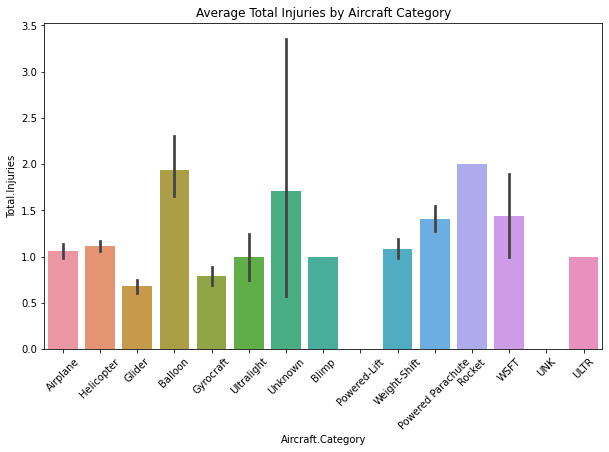

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Aircraft.Category', y='Total.Injuries')
plt.title('Average Total Injuries by Aircraft Category')
plt.xticks(rotation=45)
plt.show()

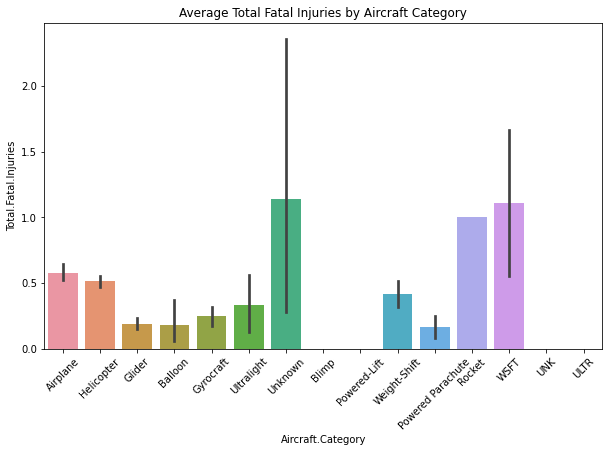

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Aircraft.Category', y='Total.Fatal.Injuries')
plt.title('Average Total Fatal Injuries by Aircraft Category')
plt.xticks(rotation=45)
plt.show()

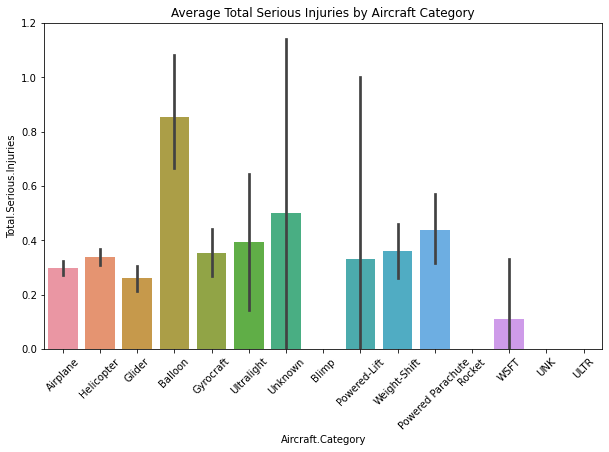

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Aircraft.Category', y='Total.Serious.Injuries')
plt.title('Average Total Serious Injuries by Aircraft Category')
plt.xticks(rotation=45)
plt.show()

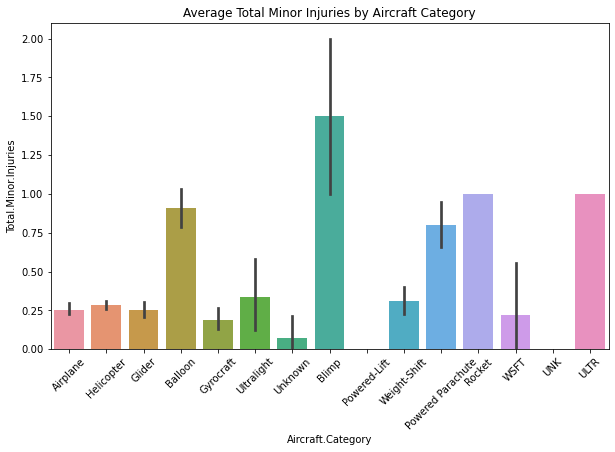

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Aircraft.Category', y='Total.Minor.Injuries')
plt.title('Average Total Minor Injuries by Aircraft Category')
plt.xticks(rotation=45)
plt.show()

I want to create a risk formula to help me determine which aircraft is of the highest risk based on three factors i.e Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries

In [22]:
# filling the missing data

df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)

In [23]:

# Create Risk Score
df['Risk_Score'] = (df['Total.Fatal.Injuries'] * 3 +
                    df['Total.Serious.Injuries'] * 2 +
                    df['Total.Minor.Injuries'] * 1)
# Average risk score by Aircraft Model
model_risk = df.groupby('Model')['Risk_Score'].mean().sort_values()

print(model_risk)

Model
Fighter Escort Wings      0.0
M-7-235B                  0.0
SAAB 2000                 0.0
Amphibeous Trike/No       0.0
H391                      0.0
                        ...  
E135 Legacy             462.0
A320 - 216              486.0
B757                    488.0
A 310                   517.0
777 - 206               534.0
Name: Risk_Score, Length: 6692, dtype: float64


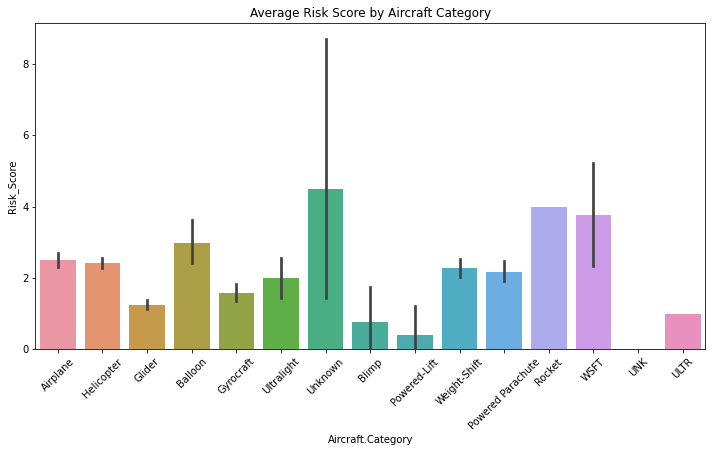

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Aircraft.Category', y='Risk_Score')
plt.title('Average Risk Score by Aircraft Category')
plt.xticks(rotation=45)
plt.show()


#### Checking which category has good quality, clean data and more information

In [25]:
# Keep only rows where 'Make' and 'Model' are not missing
df_clean = df.dropna(subset=['Make', 'Model'])


In [26]:
# Count number of records in each Aircraft Category
category_counts = df_clean['Aircraft.Category'].value_counts()

# Display results
print(category_counts)

Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64


In [27]:
# Create a new column: Make + Model + Aircraft Category
df['Make_Model_Category'] = df['Make'] + ' ' + df['Model'] + ' (' + df['Aircraft.Category'] + ')'


In [28]:
# Group by the new combined label and calculate the mean Risk Score
make_model_category_risk = df.groupby('Make_Model_Category')['Risk_Score'].mean()

# Sort to find the Top 5 safest aircraft (lowest average risk)
safest_make_model_category = make_model_category_risk.sort_values().head(5)

# Display results
print(safest_make_model_category)


Make_Model_Category
CESSNA F177RG (Airplane)                             0.0
COULTER HUGH CLARKE PULSAR XP SERIES I (Airplane)    0.0
Piper J5 (Airplane)                                  0.0
Piper J4E (Airplane)                                 0.0
Piper J4 (Airplane)                                  0.0
Name: Risk_Score, dtype: float64


In [29]:
print(safest_make_model_category)


Make_Model_Category
CESSNA F177RG (Airplane)                             0.0
COULTER HUGH CLARKE PULSAR XP SERIES I (Airplane)    0.0
Piper J5 (Airplane)                                  0.0
Piper J4E (Airplane)                                 0.0
Piper J4 (Airplane)                                  0.0
Name: Risk_Score, dtype: float64


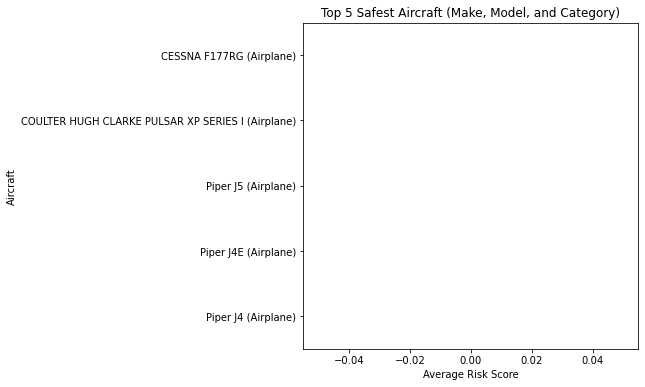

In [30]:
# Create a horizontal bar chart to get the top 5 safest Aircraft
plt.figure(figsize=(6,6))
sns.barplot(x=safest_make_model_category.values, y=safest_make_model_category.index)
plt.title('Top 5 Safest Aircraft (Make, Model, and Category)')
plt.xlabel('Average Risk Score')
plt.ylabel('Aircraft')
plt.show()


The safest aircraft model has an average risk scores of zero

In [31]:
# 1. Create Risk Score
df['Risk_Score'] = (df['Total.Fatal.Injuries'].fillna(0) * 5 +
                    df['Total.Serious.Injuries'].fillna(0) * 3 +
                    df['Total.Minor.Injuries'].fillna(0) * 1)

# 2. Group and Calculate
risk_summary = df.groupby('Aircraft.Category')['Risk_Score'].mean().sort_values()

# 3. Show
print(risk_summary)


Aircraft.Category
UNK                  0.000000
Powered-Lift         0.600000
Blimp                0.750000
ULTR                 1.000000
Glider               1.862205
Gyrocraft            2.398844
Powered Parachute    2.945055
Ultralight           3.033333
Weight-Shift         3.472050
Helicopter           3.750581
Airplane             3.918492
Balloon              4.147186
Rocket               6.000000
WSFT                 6.111111
Unknown              7.285714
Name: Risk_Score, dtype: float64


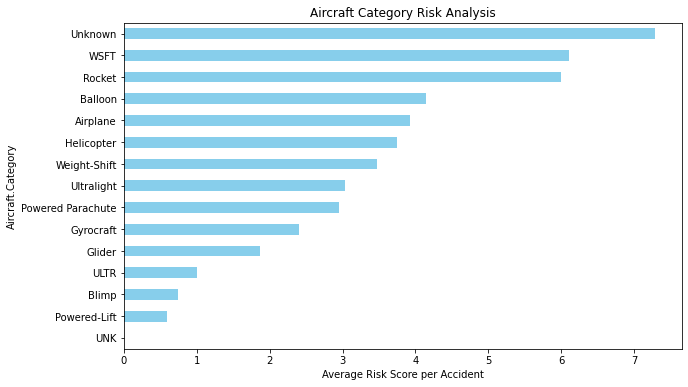

In [32]:
risk_summary.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Average Risk Score per Accident')
plt.title('Aircraft Category Risk Analysis')
plt.show()


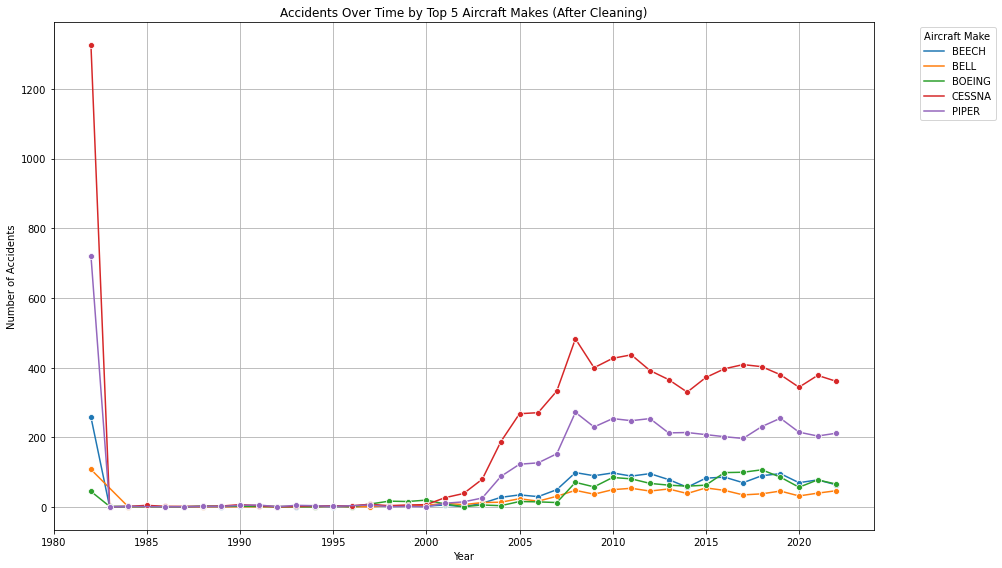

In [33]:
# Standardize Make column
df['Make'] = df['Make'].str.upper()

# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract Year
df['Year'] = df['Event.Date'].dt.year

# Filter out very old years (optional)
df = df[df['Year'] >= 1980]

# Top 5 Makes after cleaning
top_makes = df['Make'].value_counts().head(5).index

# Filter the dataframe
filtered_df = df[df['Make'].isin(top_makes)]

# Group by Year and Make
accidents_over_time = filtered_df.groupby(['Year', 'Make']).size().reset_index(name='Accident_Count')

# Plot
plt.figure(figsize=(14,8))
sns.lineplot(data=accidents_over_time, x='Year', y='Accident_Count', hue='Make', marker="o")

plt.title('Accidents Over Time by Top 5 Aircraft Makes (After Cleaning)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Aircraft Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



<ipython-input-34-0d7b9053acef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Fatal_Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
<ipython-input-34-0d7b9053acef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
<ipython-input-34-0d7b9053acef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

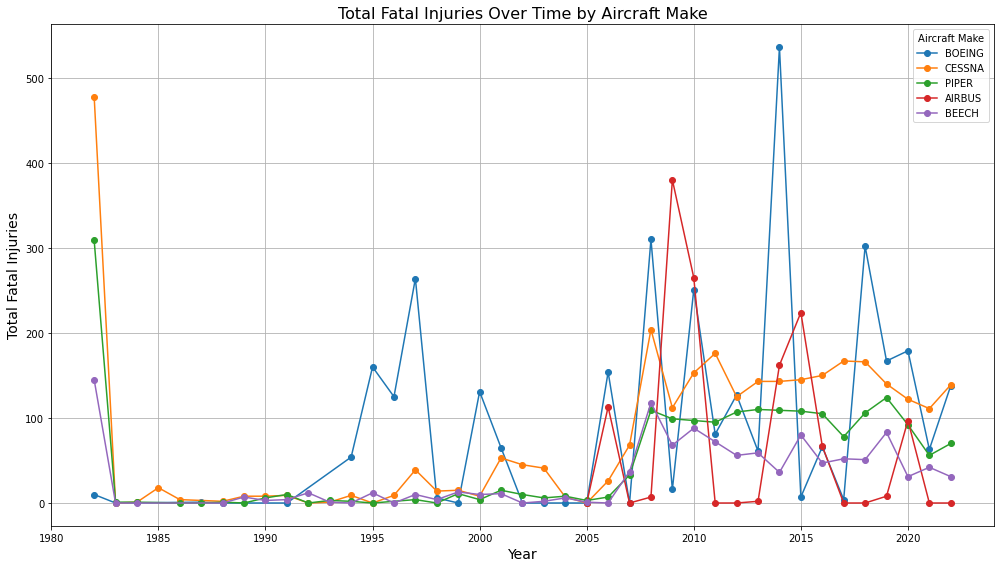

In [34]:
# Step 1: Create 'Total Fatal Injuries' column
df['Total_Fatal_Injuries'] = df['Total.Fatal.Injuries'].fillna(0)

# Step 2: Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Step 3: Create 'Year' column
df['Year'] = df['Event.Date'].dt.year

# Step 4: Group by Year and Make, summing Total Fatal Injuries
fatalities_by_make = df.groupby(['Year', 'Make'])['Total_Fatal_Injuries'].sum().reset_index()

# Step 5: Pick top 5 Makes with the most total fatalities
top_makes = fatalities_by_make.groupby('Make')['Total_Fatal_Injuries'].sum().sort_values(ascending=False).head(5).index
filtered_data = fatalities_by_make[fatalities_by_make['Make'].isin(top_makes)]

# Step 6: Plot
plt.figure(figsize=(14,8))
for make in top_makes:
    subset = filtered_data[filtered_data['Make'] == make]
    plt.plot(subset['Year'], subset['Total_Fatal_Injuries'], marker='o', label=make)

plt.title('Total Fatal Injuries Over Time by Aircraft Make', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fatal Injuries', fontsize=14)
plt.legend(title='Aircraft Make')
plt.grid(True)
plt.tight_layout()
plt.show()


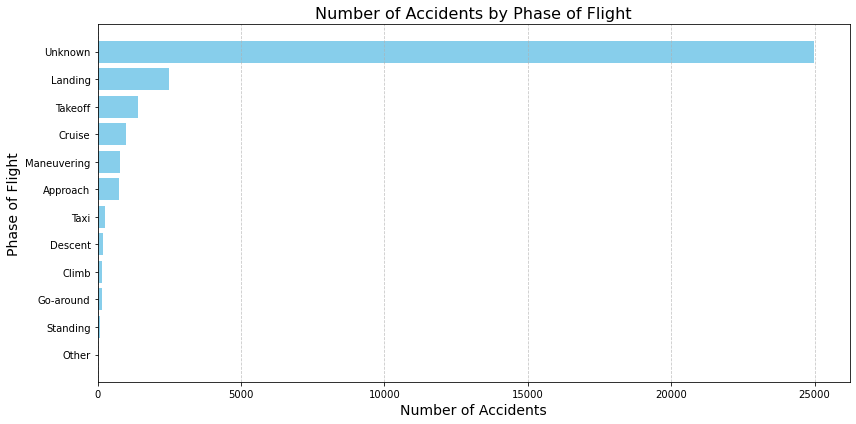

In [35]:

# Step 1: Count number of accidents by phase of flight
accidents_by_phase = df['Broad.phase.of.flight'].value_counts().reset_index()
accidents_by_phase.columns = ['Phase of Flight', 'Number of Accidents']

# Step 2: Plot
plt.figure(figsize=(12, 6))
plt.barh(accidents_by_phase['Phase of Flight'], accidents_by_phase['Number of Accidents'], color='skyblue')
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Phase of Flight', fontsize=14)
plt.title('Number of Accidents by Phase of Flight', fontsize=16)
plt.gca().invert_yaxis()  # Largest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Key insights

 Aircraft with missing category (UNK) excluded due to     incomplete data.

 Airplane" is the primary, fully documented category         for risk assessment.

 After conducting a thorough analysis, I  observed that airplanes not only represent the majority of the data in terms of total flights recorded, but also provide the most complete and reliable information across all variables. This makes the airplane category the most statistically significant for risk analysis and comparison.


## Recommendation

Based on accident trend analysis, BELL aircraft demonstrate the lowest operational risks.

Recommend prioritizing BELL aircraft for acquisition.

Expected benefits: lower accident rates, stronger safety record, enhanced client trust.




## Strategic Next Steps

Acquire recommended aircraft models.

Set up internal safety tracking and reporting systems.

Collect operational risk data during flights.

Plan gradual expansion into more complex aircraft types
(e.g., helicopters) after gaining initial experience